# Information Visualization Exercise 1
**Team 20**

Members:
- 	Ghazal Arzanian
- 	Anna Laczkó

## Libraries:

In [ ]:
!pip install kaggle
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 16.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from google.colab import files
import shutil
import zipfile
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


## Loading Data From Kaggle to colab


To able to download the data from Kaggle, you need to do the following:
- A registration needed on the website
- After login, in settings-> account you need to create a new API token
- This will download a kaggle.json file
- Upload this file in the second cell

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ghazalarzanian","key":"9d0b351c849dc8588db228096d30cab6"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          23384        464  0.9411765        
sahilnbajaj/loans-data                                      Loans Data                                     213KB  2024-04-07 15:08:37            848         23  1.0              
sahirmaharajj/air-pollution-dataset                         Air Pollution Dataset                          213KB  2024-04-07 13:14:48            932         29  1.0              
sanyamgoyal401/customer-purchases-behaviour-dataset         Customer Purchases Behaviour Dataset         

In [ ]:
!kaggle datasets download -d harisbeslic/nba-player-data-by-game-from-1949-to-2019 -f players.csv
!kaggle datasets download -d harisbeslic/nba-player-data-by-game-from-1949-to-2019 -f teams.csv
!kaggle datasets download -d harisbeslic/nba-player-data-by-game-from-1949-to-2019 -f player_data_per_36_min.csv

  0% 0.00/6.65M [00:00<?, ?B/s]
100% 6.65M/6.65M [00:00<00:00, 70.8MB/s]
  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 11.2MB/s]
  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 66.5MB/s]


In [ ]:
with zipfile.ZipFile("players.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")

with zipfile.ZipFile("player_data_per_36_min.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Dataset")

In [ ]:
destination_path = os.path.join('/content/Dataset', os.path.basename('/content/teams.csv'))

if not os.path.exists(destination_path):
  shutil.move("/content/teams.csv", "/content/Dataset")

## Explanations



- **player_id**: A unique identifier for each player.
- **season**: The NBA season for which the statistics apply, usually formatted as the starting year or the starting-ending year (e.g., 2023-2024).
- **total_games**: The total number of games played by the player in the specified season.
- **games_started**: The number of games in which the player was in the starting lineup.
- **minutes_played**: Total minutes the player has played over the season.
- **fg**: Field Goals Made - the total number of baskets a player scores from the field.
- **fga**: Field Goals Attempted - the total number of field goal attempts by the player.
- **fgp**: Field Goal Percentage - the percentage of field goal attempts that were made (fg/fga).
- **fg3**: Three-Point Field Goals Made - the number of baskets made from beyond the three-point line.
- **fg3a**: Three-Point Field Goals Attempted - the total number of attempts from beyond the three-point line.
- **fg3p**: Three-Point Field Goal Percentage - the percentage of three-point field goal attempts that were made (fg3/fg3a).
- **fg2**: Two-Point Field Goals Made - the number of baskets made inside the three-point line.
- **fg2a**: Two-Point Field Goals Attempted - the total number of attempts inside the three-point line.
- **fg2p**: Two-Point Field Goal Percentage - the percentage of two-point field goal attempts that were made (fg2/fg2a).
- **ft**: Free Throws Made - the number of free throws that a player has scored.
- **fta**: Free Throws Attempted - the total number of free throw attempts by the player.
- **ftp**: Free Throw Percentage - the percentage of free throw attempts that were made (ft/fta).
- **orb**: Offensive Rebounds - the number of rebounds a player has collected while his team is on offense.
- **drb**: Defensive Rebounds - the number of rebounds a player has collected while his team is on defense.
- **trb**: Total Rebounds - the total number of offensive and defensive rebounds a player has collected.
- **ast**: Assists - the number of times a player has passed the ball leading directly to a score by his team.
- **stl**: Steals - the number of times a player has taken the ball away from an opponent, leading to his team gaining possession.
- **blk**: Blocks - the number of times a player has deflected an opponent's field goal attempt, preventing it from scoring.
- **tov**: Turnovers - the number of times a player has lost possession of the ball to the opposing team.
- **pf**: Personal Fouls - the total number of personal fouls a player has committed.
- **pts**: Points - the total number of points a player has scored.
- **full_name**: The full name of the player.
- **position**: The player's position on the team (e.g., Point Guard, Shooting Guard, etc.).
- **height**: The player's height.
- **weight**: The player's weight.
- **current_team_id**: A unique identifier for the player's current team.
- **teams**: A list or history of teams the player has been part of.
- **team_name**: The name of the team for which the player statistics apply in the specified season.

## Task 1 - Merging dataframes (3 points)
- Read the three CSV using Pandas. See the pandas.read_csv documentation to check how to parse the CSV correctly!
- Merge the two datasets player_data_per_36_min.csv and players.csv into one table.
- Add a team_name column to your new data frame based on the team_id column retrieving the name from the teams.csv dataset.

You should now have a table that includes player info from players.csv, and players performance statistics from player_data_per_36_min.csv, and the team’s name from teams.csv.

In [ ]:

players = pd.read_csv('/content/Dataset/players.csv')
player_36 = pd.read_csv('/content/Dataset/player_data_per_36_min.csv')
teams = pd.read_csv('/content/Dataset/teams.csv')

In [ ]:
player_36.columns

Index(['id', 'player_id', 'season', 'total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [ ]:
print(len(player_36))
print(len(players))

26674
4820


In [ ]:
players.columns

Index(['id', 'name', 'full_name', 'position', 'height', 'weight', 'birth_date',
       'birth_place', 'retired', 'player_url', 'current_team_id', 'teams',
       'text'],
      dtype='object')

In [ ]:
Data_table = pd.merge(player_36,players, left_on='player_id', right_on='id', how='left')
Data_table.columns
print(len(Data_table))

26674


In [ ]:
teams.columns

Index(['team_id', 'team_name', 'short_name', 'years', 'total_games',
       'total_wins', 'total_losses', 'win_loss_percentage', 'champions',
       'other_names', 'link', 'active'],
      dtype='object')

In [ ]:
merged_data = pd.merge(Data_table, teams[['team_id', 'team_name']], left_on='current_team_id', right_on='team_id', how='left')

merged_data.drop('team_id', axis=1, inplace=True)

merged_data

,id_x,player_id,season,total_games,games_started,minutes_played,fg,fga,fgp,fg3,...,height,weight,birth_date,birth_place,retired,player_url,current_team_id,teams,text,team_name
0,1,134,1949-50,63.0,NaN,NaN,NaN,NaN,0.279,NaN,...,5-11,170.0,November 1 1918,"Fort Wayne, Indiana",True,/players/a/armstcu01.html,NaN,[],"Paul Carlyle ""Curly"" Armstrong (November 1, 19...",NaN
1,2,206,1949-50,49.0,NaN,NaN,NaN,NaN,0.372,NaN,...,6-2,185.0,January 15 1921,"Yorktown, Indiana",True,/players/b/barkecl01.html,NaN,[],"Clifford ""Cliff"" Eugene Barker (January 15, 19...",NaN
2,3,221,1949-50,67.0,NaN,NaN,NaN,NaN,0.349,NaN,...,6-4,190.0,May 11 1924,"Indianapolis, Indiana",True,/players/b/barnhle01.html,NaN,"[33, 32]","Leo A. ""Barney"" Barnhorst (May 11, 1924 – Augu...",NaN
3,4,235,1949-50,15.0,NaN,NaN,NaN,NaN,0.256,NaN,...,6-5,195.0,October 8 1925,"New York, New York",True,/players/b/barteed01.html,NaN,"[36, 20]","Edward John Bartels (October 8, 1925 – Novembe...",NaN
4,5,235,1949-50,13.0,NaN,NaN,NaN,NaN,0.256,NaN,...,6-5,195.0,October 8 1925,"New York, New York",True,/players/b/barteed01.html,NaN,"[36, 20]","Edward John Bartels (October 8, 1925 – Novembe...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26669,26670,4814,2019-20,2.0,0.0,10.0,3.6,18.0,0.200,3.6,...,6-5,196.0,July 26 1995,"Ottawa, Canada",False,/players/s/shayoma01.html,29.0,[29],"Marial Makur Shayok (born July 26, 1995) is a ...",Utah Jazz
26670,26671,4817,2019-20,2.0,0.0,11.0,3.3,13.1,0.250,0.0,...,6-3,184.0,January 19 1996,"Memphis, Tennessee",False,/players/m/martije02.html,3.0,[3],"Jeremiah Martin (born June 19, 1996) is an Ame...",Brooklyn Nets
26671,26672,4818,2019-20,2.0,0.0,13.0,0.0,11.1,0.000,0.0,...,6-8,205.0,October 25 1993,"Montbrison, France",False,/players/h/howarwi01.html,11.0,"[29, 11]","William Howard (born October 25, 1993) is a Fr...",Houston Rockets
26672,26673,4819,2019-20,4.0,0.0,41.0,3.5,16.7,0.211,3.5,...,6-3,200.0,June 14 1996,"Modesto, California",False,/players/v/vincega01.html,16.0,"[26, 16]","Gabriel Nnamdi Vincent (born June 14, 1996) is...",Miami Heat


In [ ]:
print(Data_table['current_team_id'].iloc[51:60])

51   NaN
52   NaN
53   NaN
54   NaN
55   NaN
56   NaN
57   NaN
58   NaN
59   NaN
Name: current_team_id, dtype: float64


In [ ]:
print(teams.loc[teams['team_id'] == 19.0, 'team_name'].iloc[0])
print(teams.loc[teams['team_id'] == 15.0, 'team_name'].iloc[0])
print(teams.loc[teams['team_id'] == 3.0, 'team_name'].iloc[0])
print(teams.loc[teams['team_id'] == 20.0, 'team_name'].iloc[0])

New Orleans Pelicans
Memphis Grizzlies
Brooklyn Nets
New York Knicks


In [ ]:
print(merged_data['team_name'].iloc[51:60])

51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
Name: team_name, dtype: object


In [ ]:
Data_table=merged_data

In [ ]:
Data_table.columns

Index(['id_x', 'player_id', 'season', 'total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'id_y', 'name', 'full_name', 'position',
       'height', 'weight', 'birth_date', 'birth_place', 'retired',
       'player_url', 'current_team_id', 'teams', 'text', 'team_name'],
      dtype='object')

In [ ]:
Data_table = Data_table.drop('id_y', axis=1)

In [ ]:
Data_table= Data_table.rename(columns={'id_x': 'id'})

## Task 2 - Data Cleaning (3 points)
- Take care of missing values. Sci-kit learn provides different data imputation methods.
- Remove unusable rows or columns, if necessary.  
- If the player has no current team, replace the empty value with "Retired". (Hint: You may need to impute before you completely filter your dataframe. You need to make an educated judgment).

In [ ]:
Data_table.isna().sum()

id                     0
player_id              0
season                 0
total_games           29
games_started       6466
minutes_played       553
fg                   558
fga                  558
fgp                  166
fg3                 5777
fg3a                5777
fg3p                9443
fg2                 4116
fg2a                4116
fg2p                4286
ft                   558
fta                  558
ftp                 1059
orb                 3907
drb                 3907
trb                  566
ast                  558
stl                 3907
blk                 3907
tov                 5059
pf                   558
pts                  558
name                   0
full_name              0
position               0
height                 0
weight                 3
birth_date             1
birth_place          396
retired                0
player_url             0
current_team_id    23844
teams                  0
text                   0
team_name          23844


In [ ]:
len(Data_table.columns)

40

In [ ]:
Data_table.isna().sum(axis=1)

0        23
1        23
2        23
3        23
4        23
         ..
26669     1
26670     2
26671     2
26672     1
26673     4
Length: 26674, dtype: int64

In [ ]:
cols=['fg','fga', 'fgp']

In [ ]:
df_merged=Data_table.copy() # the name of the dataframed is changed because I (Anna Laczkó) copied from my work on my local jupyter notebook. At the end of the task I switch back to the original

In [ ]:
# The following values are not independent, we can calculate them from eachother and this way we can eliminate some nan values.

# This is why:
# Let's look at the first row below:  fg: Field Goals
#                                     fga: Field Goals Attempts
#                                     fgp: Field Goal Percentage
# We can calculate the percentage from the other two. This is true for the other rows as well, these are also attempts, successes, and percentages.
# Sadly we can only calculate the percentage, and only if it's 0, because the dataframe was not cleaned properly.
# If the attempts were 0, then the previous cleaning method did a division with 0 and filled the percentage value with nan. We can correct this mistake.

df_merged.loc[:,'fgp'] = np.where((df_merged['fg'] == 0) | (df_merged['fga'] == 0), 0, df_merged['fgp'])
df_merged.loc[:,'fg3p'] = np.where((df_merged['fg3'] == 0) | (df_merged['fg3a'] == 0), 0, df_merged['fg3p'])
df_merged.loc[:,'fg2p'] = np.where((df_merged['fg2'] == 0) | (df_merged['fg2a'] == 0), 0, df_merged['fg2p'])
df_merged.loc[:,'ftp'] = np.where((df_merged['ft'] == 0) | (df_merged['fta'] == 0), 0, df_merged['ftp'])

In [ ]:
df_merged.isna().sum() # we can see that we could regulate some of the percentage data

id                     0
player_id              0
season                 0
total_games           29
games_started       6466
minutes_played       553
fg                   558
fga                  558
fgp                   52
fg3                 5777
fg3a                5777
fg3p                5777
fg2                 4116
fg2a                4116
fg2p                4116
ft                   558
fta                  558
ftp                   56
orb                 3907
drb                 3907
trb                  566
ast                  558
stl                 3907
blk                 3907
tov                 5059
pf                   558
pts                  558
name                   0
full_name              0
position               0
height                 0
weight                 3
birth_date             1
birth_place          396
retired                0
player_url             0
current_team_id    23844
teams                  0
text                   0
team_name          23844


In [ ]:
len(df_merged)

26674

In [ ]:
df_merged=df_merged.dropna(axis=0, thresh=30) # let's drop those rows, which have less than 30 non-nan values (we have 40 columns)

In [ ]:
len(df_merged) #during cleaning we have lost 4000 records

22753

In [ ]:
df_merged.isna().sum() # the nan values are looking much better

id                     0
player_id              0
season                 0
total_games            0
games_started       2550
minutes_played         0
fg                     0
fga                    0
fgp                    0
fg3                 1856
fg3a                1856
fg3p                1856
fg2                  751
fg2a                 751
fg2p                 751
ft                     0
fta                    0
ftp                    0
orb                    0
drb                    0
trb                    0
ast                    0
stl                    0
blk                    0
tov                 1138
pf                     0
pts                    0
name                   0
full_name              0
position               0
height                 0
weight                 0
birth_date             0
birth_place            5
retired                0
player_url             0
current_team_id    19923
teams                  0
text                   0
team_name          19923


In [ ]:
df_merged['games_started'].fillna(0, inplace=True) # this value shows how many times was the player in the starting team. We decided to fill the nan values with null

In [ ]:
df_merged['current_team_id'].fillna('retired', inplace=True)
df_merged['team_name'].fillna('retired', inplace=True)

In [ ]:
#When we examined the nan values, we could see that the most is in the fg3p row. Let's make a dataframe without that rows! This will be the dataframe, we want to use to train the Imputer

df_nonull=df_merged.dropna(axis=0, subset=['fg3p'])

In [ ]:
df_nonull.columns

Index(['id', 'player_id', 'season', 'total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'name', 'full_name', 'position', 'height',
       'weight', 'birth_date', 'birth_place', 'retired', 'player_url',
       'current_team_id', 'teams', 'text', 'team_name'],
      dtype='object')

In [ ]:
#Let's keep only those columns which have numeric values (these are the only values the Imputer can work with)

df_nonull=df_nonull[['total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts']]

In [ ]:
df=df_merged.copy()

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit(df_nonull)

IterativeImputer(random_state=0)

In [ ]:
# Let's use the Imputer on our original dataframe, but only the numeric columns

imputed_data = imp.transform(df[['total_games', 'games_started',
                                        'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
                                        'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
                                        'blk', 'tov', 'pf', 'pts']])

In [ ]:
# Transform into pandas dataframe

imputed_df = pd.DataFrame(imputed_data, columns=['total_games', 'games_started',
                                                 'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
                                                 'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
                                                 'blk', 'tov', 'pf', 'pts'], index=df.index)

In [ ]:
# Place it back to the original dataframe with the non-numeric columns too

for col in imputed_df.columns:
    df[col] = imputed_df[col]

In [ ]:
df.columns

Index(['id', 'player_id', 'season', 'total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'name', 'full_name', 'position', 'height',
       'weight', 'birth_date', 'birth_place', 'retired', 'player_url',
       'current_team_id', 'teams', 'text', 'team_name'],
      dtype='object')

In [ ]:
# Make the seasons contain only the first part of the years. (example: 1972-73 --> 1972)

df['season']=df['season'].apply(lambda x: x.split('-')[0])

In [ ]:

# drop the columns which aren't important to the visualization

Data_table=df.drop(columns=['name','id','birth_date','birth_place','player_url', 'retired','text'])

In [ ]:
Data_table.isna().sum() # The only nan values left are the retired players' team_id

player_id          0
season             0
total_games        0
games_started      0
minutes_played     0
fg                 0
fga                0
fgp                0
fg3                0
fg3a               0
fg3p               0
fg2                0
fg2a               0
fg2p               0
ft                 0
fta                0
ftp                0
orb                0
drb                0
trb                0
ast                0
stl                0
blk                0
tov                0
pf                 0
pts                0
full_name          0
position           0
height             0
weight             0
current_team_id    0
teams              0
team_name          0
dtype: int64

In [ ]:
Data_table=df.copy()

## Task 3 - New Tables (2 points)
Create two new tables: one that groups rows based on player_id, another that groups rows based on team_id.



In [ ]:
Data_table.columns

Index(['id', 'player_id', 'season', 'total_games', 'games_started',
       'minutes_played', 'fg', 'fga', 'fgp', 'fg3', 'fg3a', 'fg3p', 'fg2',
       'fg2a', 'fg2p', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'name', 'full_name', 'position', 'height',
       'weight', 'birth_date', 'birth_place', 'retired', 'player_url',
       'current_team_id', 'teams', 'text', 'team_name'],
      dtype='object')

In [ ]:
file_path = '/content/output.csv'
Data_table.to_csv(file_path, index=False)

In [ ]:
# preparing columns for the custom aggregation

col_for_sum=['total_games', 'games_started', 'minutes_played',
       'fg', 'fga',  'fg3', 'fg3a',  'fg2', 'fg2a', 'ft',
       'fta',  'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']
col_for_mean=['fgp', 'fg3p', 'fg2p', 'ftp']
col_for_first=['full_name', 'position', 'height', 'weight', 'current_team_id','team_name', 'teams']

In [ ]:
# aggregations

sum_agg={col: 'sum' for col in col_for_sum} #this could be changed to mean instead of sum. Depends on the usage
first_agg={col: 'first' for col in col_for_first}
mean_agg={col: 'mean' for col in col_for_mean}

In [ ]:
# grouping by players, aggregating

df_group_players=Data_table.groupby('player_id', as_index=False).agg({
    **first_agg,
    'season': 'count',
    **sum_agg,
    **mean_agg
})

df_group_players.loc[:, 'teams']=df_group_players['teams'].apply(lambda x: None if pd.isna(x) else len(x.split(',')))

In [ ]:
#columns for aggregation
col_for_sum=['fg', 'fga',  'fg3', 'fg3a',  'fg2', 'fg2a', 'ft',
       'fta',  'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts']
col_for_mean=['fgp', 'fg3p', 'fg2p', 'ftp']

In [ ]:
# aggregations for different columns

sum_agg={col: 'sum' for col in col_for_sum}
mean_agg={col: 'mean' for col in col_for_mean}

In [ ]:
#I'm using the season 2018-2019 because this should be a whole season and quite recent
Data_table_filtered=Data_table[Data_table['season']=='2018']

In [ ]:
# grouping by teams, aggregating

df_group_teams=Data_table.groupby('current_team_id', as_index=False).agg({
    'team_name': 'first',
    'total_games': 'max',
    **sum_agg,
    **mean_agg
})

In [ ]:
df_group_teams

,current_team_id,team_name,total_games,fg,fga,fg3,fg3a,fg2,fg2a,ft,...,ast,stl,blk,tov,pf,pts,fgp,fg3p,fg2p,ftp
0,1.0,Atlanta Hawks,82.0,550.2,1206.8,109.80000,316.400000,440.300000,890.300000,268.3,...,308.0,104.5,102.1,204.300000,377.6,1478.3,0.459268,0.275021,0.490031,0.730010
1,2.0,Boston Celtics,82.0,382.4,809.0,76.10000,229.000000,306.500000,580.000000,181.0,...,192.5,71.1,49.3,131.800000,205.1,1021.9,0.472726,0.298371,0.522387,0.760258
2,3.0,Brooklyn Nets,82.0,618.6,1391.0,161.90000,484.500000,457.000000,907.300000,298.0,...,373.3,128.9,89.2,245.000000,339.6,1697.2,0.450631,0.278162,0.492559,0.677622
3,4.0,Charlotte Hornets,82.0,276.0,604.4,60.50000,177.500000,215.800000,426.600000,128.3,...,158.4,56.9,55.8,105.900000,185.0,739.8,0.448069,0.244448,0.484224,0.701897
4,5.0,Chicago Bulls,82.0,383.6,825.8,86.50000,248.900000,297.000000,577.300000,131.0,...,191.6,92.1,38.8,114.600000,199.9,984.0,0.468955,0.292500,0.515909,0.731667
5,6.0,Cleveland Cavaliers,82.0,401.4,859.9,68.00000,221.000000,333.100000,638.600000,200.4,...,214.1,96.2,59.2,159.100000,261.4,1071.5,0.456333,0.211213,0.498600,0.659080
6,7.0,Dallas Mavericks,81.0,633.7,1409.7,149.80000,409.700000,483.700000,999.200000,280.1,...,336.3,138.0,76.2,201.400000,347.5,1697.7,0.453088,0.300858,0.484770,0.729177
7,8.0,Denver Nuggets,82.0,505.5,1076.1,95.70000,279.800000,410.200000,796.600000,244.1,...,274.9,104.0,84.8,178.700000,305.0,1352.3,0.481798,0.276876,0.509933,0.717955
8,9.0,Detroit Pistons,82.0,677.8,1561.8,166.90000,502.200000,510.300000,1060.100000,295.8,...,410.4,109.8,79.3,252.900000,334.8,1818.5,0.430158,0.300053,0.467342,0.730342
9,10.0,Golden State Warriors,82.0,384.0,867.3,120.10000,325.600000,264.300000,541.700000,156.9,...,245.0,81.4,41.1,150.600000,198.1,1045.7,0.437161,0.332532,0.477145,0.731677


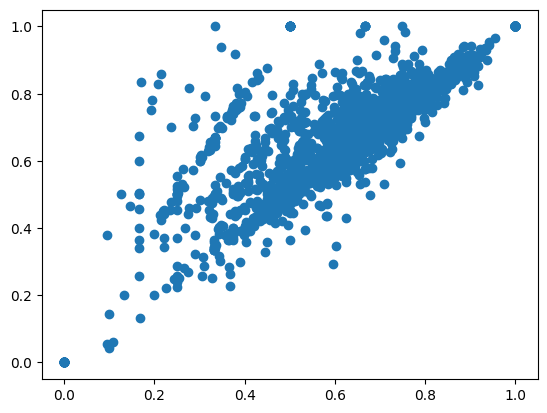

In [ ]:
plt.scatter(df_group_players['ftp'], df_group_players['ft']/df_group_players['fta'])

## Task 4 - Visualization (max 5 points each)
Visualize the data (twice).

Every submitted notebook should contain at least two visualizations using at least two different Python visualization libraries. One visualization for each of the new tables (aggregated players or aggregated teams).

You must concisely describe and explain each visualization and your decisions in a Markdown field. You will not receive the points for this task if you did not add a description/explanation.

### Task 4/a - Visualizing players

*Importing Libraries*

In [ ]:
import matplotlib.pyplot as plt
import dash

#### Visualization 1-1 Interactive Basketball Player Performance Analysis Baed on Their *Positions*


I made this Dash application that allows users to select a basketball player's position from a dropdown menu. Based on selection, the application generates a scatter plot showing the relationship between the total number of games played and the field goal percentage (%) for players in the chosen position. The plot is interactive, with the ability to zoom and hover over data points for detailed information. The application ensures data cleanliness by filtering out players with zero total games and field goal percentages outside the valid range of 0% to 100%

In [ ]:
max_total_games = df_group_players['total_games'].max()
app = dash.Dash(__name__)

app.layout = html.Div([
    html.Label('Select Player Position:'),
    dcc.Dropdown(
        id='position-dropdown',
        options=[{'label': pos, 'value': pos} for pos in df_group_players['position'].unique()],
        value=df_group_players['position'].unique()[0]
    ),
    dcc.Graph(id='position-stats')
])

@app.callback(
    Output('position-stats', 'figure'),
    [Input('position-dropdown', 'value')]
)
def update_position_stats(selected_position):
    selected_data = df_group_players[(df_group_players['position'] == selected_position) & (df_group_players['total_games'] > 0)]
    selected_data = selected_data[(selected_data['fgp'] >= 0) & (selected_data['fgp'] <= 1)]
    grouped_data = selected_data.groupby(['total_games', 'fgp']).size().reset_index(name='num_players')
    grouped_data['fgp_percentage'] = grouped_data['fgp'] * 100
    fig = px.scatter(grouped_data, x='total_games', y='fgp_percentage',
                     title=f'Relationships for Position: {selected_position}',
                     labels={'total_games': 'Total Games Played', 'fgp_percentage': 'Field Goal Percentage (%)',
                             'num_players': 'Number of Players'},
                     range_x=[0, max_total_games], range_y=[0, 100])
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

#### Visualization 1-2 Comparative Analysis of Basketball Player Performance by Position

In this visualization I used a comparative analysis of basketball player performance across various positions. It plots the relationship between the total number of games played and the field goal percentage (%) for players in each position. The subplot grid allows for simultaneous comparison of player performance across different positions, that enables us to gain an overview of performance trends across the dataset.It becomes clear from the scatter plots that the majority of field goals are made by players in the positions of Guards (G), Forwards (F), and Centers (C)  in descending order of frequency.

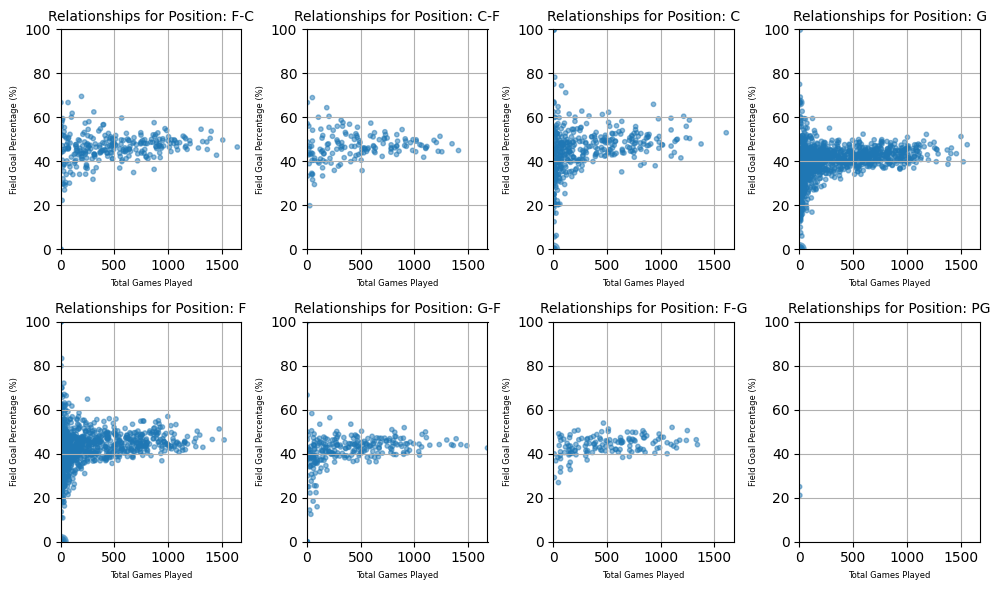

In [ ]:

max_total_games = df_group_players['total_games'].max()
positions = df_group_players['position'].unique()

num_rows = (len(positions) + 2) // 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

if num_rows > 1:
    axes = axes.flatten()
for i, position in enumerate(positions):

    selected_data = df_group_players[(df_group_players['position'] == position) & (df_group_players['total_games'] > 0)]
    selected_data = selected_data[(selected_data['fgp'] >= 0) & (selected_data['fgp'] <= 1)]
    grouped_data = selected_data.groupby(['total_games', 'fgp']).size().reset_index(name='num_players')
    grouped_data['fgp_percentage'] = grouped_data['fgp'] * 100

    ax = axes[i]
    ax.scatter(grouped_data['total_games'], grouped_data['fgp_percentage'], s=grouped_data['num_players']*10, alpha=0.5)
    ax.set_title(f'Relationships for Position: {position}',fontsize=10)
    ax.set_xlabel('Total Games Played',fontsize=6)
    ax.set_ylabel('Field Goal Percentage (%)',fontsize=6)
    ax.set_xlim(0, max_total_games)
    ax.set_ylim(0, 100)
    ax.grid(True)

plt.tight_layout()
plt.show()


#### Visualization 1-3 Relationship between Height and Field Goal Percentage in Basketball Player

Through this visualization, I wanted to find whether there is a correlation between the height of basketball players and their field goal percentage. However, the scatter plot reveals that there is no discernible trend or specific correlation between height and field goal percentage. This insight suggests that other factors may have a greater influence on player performance in terms of shooting accuracy.

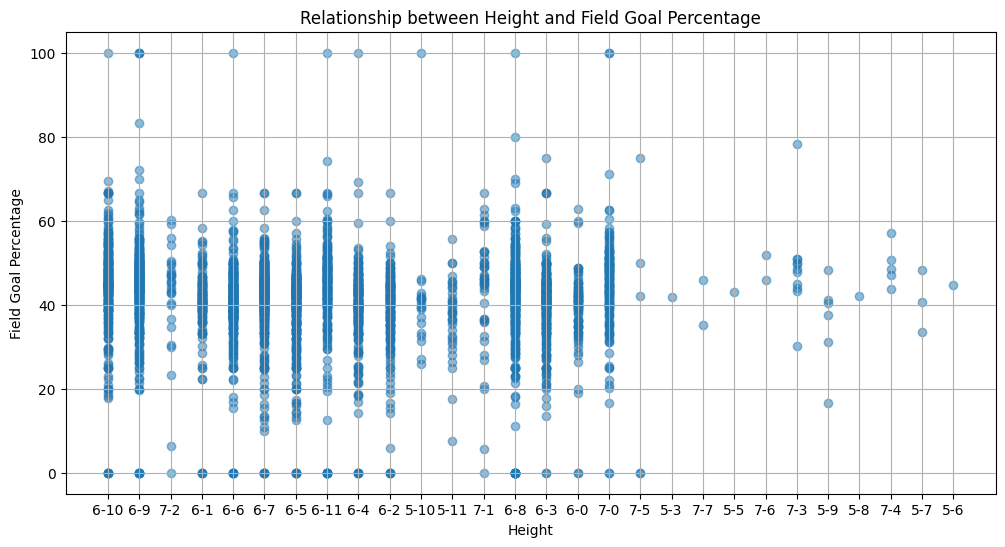

In [ ]:
valid_data = df_group_players.dropna(subset=["height", "fgp"])
plt.figure(figsize=(12, 6))
plt.scatter(valid_data["height"], valid_data["fgp"]*100, alpha=0.5)
plt.title("Relationship between Height and Field Goal Percentage")
plt.xlabel("Height")
plt.ylabel("Field Goal Percentage")
plt.grid(True)
plt.show()


### Task 4/b - Visualizing Teams

#### Visualization 2 -1 Goal Success/Fail Ratios

In [ ]:
# I want to remove this column, because for the retired players it would be irrelevant to do a statistics

df_group_teams=df_group_teams.loc[df_group_teams['team_name']!='retired']

In [ ]:
# for my visualization i need the difference to be able to show the scale between field goals made and failed

df_group_teams.loc[:,'fg2f']=df_group_teams['fg2a']-df_group_teams['fg2']
df_group_teams.loc[:,'fg3f']=df_group_teams['fg3a']-df_group_teams['fg3']
df_group_teams.loc[:,'ftf']=df_group_teams['fta']-df_group_teams['ft']

<ipython-input-68-33bc0973beae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-33bc0973beae>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-68-33bc0973beae>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#columns for the visualization

columns_for_vis=['ft', 'ftf', 'fg2', 'fg2f', 'fg3','fg3f' ]
names_for_columns=['Free Throws', 'Free Throws Fails','2 Pointers','2 Pointers Fails', '3 Pointers','3 Pointers Fails']

In [ ]:
#sorting the dataframe to have more visual information later

df_group_teams.loc[:,'total'] = df_group_teams[columns_for_vis].sum(axis=1)
df_group_teams_sorted = df_group_teams.sort_values('total', ascending=True)

<ipython-input-70-73c494a40dab>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In the following visualization I made an effort to show the number of different Goal Types made by each team. Our statistics consisted of average values per 36 minutes which is the average time a starter player spends on the court during a match. So the statistics below will also represent an average value per 36 minutes

- In the barchart we can see bars, divided into 6 parts, with 3 *hues* and 2 *shades* for each *hue*.

  - The hues divides the different **Goal Types**, the *hues* divides each goal type into **Goals Made** and **Goals That Failed**.

  - If we look the *hue* only (and not the *shade*), the 3 different bar part shows the different **Goal Attempts**

- **Goal Types** are:
  - 3 Pointers
  - 2 Pointers
  - Free Throws

In [ ]:
fig = go.Figure()

team_name=df_group_teams_sorted['team_name']

#each pair of colors are the same hue
colors = [ '#ff7f0e', '#ffb370','#1f77b4', '#51a5e1' , '#2ca02c','#4fcf4f',]

for col, name, color in zip(columns_for_vis,names_for_columns, colors):

   fig.add_trace(go.Bar(y=team_name, x=df_group_teams_sorted[col], name=name, marker_color=color, orientation='h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, height=800, title='Average Goals Sorted By Types For Each Team' )
fig.show()

#### Visualization 2-2 Average Points

In [ ]:
# calculating the points for the goals

df_group_teams.loc[:,'fg2_points']=df_group_teams['fg2']*2
df_group_teams.loc[:,'fg3_points']=df_group_teams['fg3']*3

<ipython-input-72-521f7abacda9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-521f7abacda9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#columns for the visualization

columns_for_vis=['ft','fg2_points', 'fg3_points' ]
names_for_columns=['Free Throws', '2 Pointers','3 Pointers']

In [ ]:
#sorting the dataframe to have more visual information later

df_group_teams.loc[:,'total'] = df_group_teams[columns_for_vis].sum(axis=1)
df_group_teams_sorted = df_group_teams.sort_values('total', ascending=True)

In this next visualization I show the distribution of gained points by each **Goal Type** for every teams
- The *hues* represent one-one **Goal Type**
- If we look the whole bar, we can see the **Average point** gained during each match
- I wanted to show only the ratios between the data, but if we hover our pointers on the bars, we can see the exact values as well

In [ ]:
fig = go.Figure()

team_name=df_group_teams_sorted['team_name']

#the same colors as in the previous task, but  without the pairs
colors = ['#ff7f0e', '#1f77b4', '#2ca02c']

for col, name, color in zip(columns_for_vis,names_for_columns, colors):

   fig.add_trace(go.Bar(y=team_name, x=df_group_teams_sorted[col], name=name, marker_color=color, orientation='h'))

fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'}, height=800, title='Average Points Sorted By Goal Types For Each Team'  )
fig.show()

#### Visualization 2-3 Success Percentages

In [ ]:
#columns for the visualization

columns_for_vis=['fgp','fg2p', 'fg3p', 'ftp' ]
names_for_columns=['All Field Goals Made Percentage', '2 Pointers Percentage', '3 Pointers Percentage', 'Free Throws Percentage']

In [ ]:
# making the percentages, to be more easy to understand
df_group_teams.loc[:, columns_for_vis]=df_group_teams[ columns_for_vis]*100

In [ ]:
#sorting the dataframe to have more visual information later

df_group_teams_sorted_fgg = df_group_teams.sort_values('fgp', ascending=True)
df_group_teams_sorted_fg2p = df_group_teams.sort_values('fg2p', ascending=True)
df_group_teams_sorted_fg3p = df_group_teams.sort_values('fg3p', ascending=True)
df_group_teams_sorted_ftp = df_group_teams.sort_values('ftp', ascending=True)

In [ ]:
sorted_dfs = [
    df_group_teams_sorted_fgg,
    df_group_teams_sorted_fg2p,
    df_group_teams_sorted_fg3p,
    df_group_teams_sorted_ftp
]

In the next visualization I show the success percentages concerning every **Goal Type** including the percentage for the weighted average for all **Field Goals** (which contains 3 pointers and 2 Pointers)

- Each subplot is responsible for one of the **Goal Types**
- For each subplot I sorted the dataframe again to have a descending order
- In this case I wanted to show the exact value, not just the ratio between the values, this is why we can see percentages on the bars as well

In [ ]:
fig = go.Figure()
fig = make_subplots(rows=1, cols=4, shared_yaxes=False, horizontal_spacing=0.1)

team_name=df_group_teams_sorted['team_name']

colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#c340ff']

#setting the range, otherwise we would only see the ratio between the teams and couldn't see the ratio to the whole 100%
x_axis_range = [0, 100]

for i, (col, name, sorted_df) in enumerate(zip(columns_for_vis, names_for_columns, sorted_dfs)):
  bar_values = sorted_df[col].apply(lambda x: "{:.2f}%".format(x))

  fig.add_trace(
      go.Bar(y=sorted_df['team_name'], x=sorted_df[col], name=name, marker_color=colors[i], orientation='h', width=1, text=bar_values, textposition='inside'),
      row=1, col=i+1
  )
  fig.update_xaxes(range=x_axis_range, row=1, col=i)

#I needed these changes, because the default settings made the charts unreadable
fig.update_layout(
    barmode='stack',
    yaxis={'categoryorder':'total ascending'},
    height=800,
    width=1750,
    title='Success Percentages By Goal Types' ,
    showlegend=True,
    legend=dict(
        x=0.5,
        y=1.07,
        xanchor='center',
        yanchor='top',
        orientation='h'
    ),
    margin=dict(l=100))
fig.show()

## Task 5 - Saving Data
Save the resulting tables (the cleaned player_data_per_36_min and the two new aggregated tables) as CSV.

In [ ]:
df_group_teams

,current_team_id,team_name,total_games,fg,fga,fg3,fg3a,fg2,fg2a,ft,...,fgp,fg3p,fg2p,ftp,fg2f,fg3f,ftf,total,fg2_points,fg3_points
0,1.0,Atlanta Hawks,82.0,550.2,1206.8,109.8,316.4,440.3,890.3,268.3,...,45.926804,27.502062,49.003093,73.001031,450.0,206.6,102.3,1478.3,880.6,329.4
1,2.0,Boston Celtics,82.0,382.4,809.0,76.1,229.0,306.5,580.0,181.0,...,47.272581,29.837097,52.238710,76.025806,273.5,152.9,50.8,1022.3,613.0,228.3
2,3.0,Brooklyn Nets,82.0,618.6,1391.0,161.9,484.5,457.0,907.3,298.0,...,45.063063,27.816216,49.255856,67.762162,450.3,322.6,105.6,1697.7,914.0,485.7
3,4.0,Charlotte Hornets,82.0,276.0,604.4,60.5,177.5,215.8,426.6,128.3,...,44.806897,24.444828,48.422414,70.189655,210.8,117.0,54.0,741.4,431.6,181.5
4,5.0,Chicago Bulls,82.0,383.6,825.8,86.5,248.9,297.0,577.3,131.0,...,46.895455,29.250000,51.590909,73.166667,280.3,162.4,47.2,984.5,594.0,259.5
5,6.0,Cleveland Cavaliers,82.0,401.4,859.9,68.0,221.0,333.1,638.6,200.4,...,45.633333,21.121333,49.860000,65.908000,305.5,153.0,80.2,1070.6,666.2,204.0
6,7.0,Dallas Mavericks,81.0,633.7,1409.7,149.8,409.7,483.7,999.2,280.1,...,45.308850,30.085841,48.476991,72.917699,515.5,259.9,88.7,1696.9,967.4,449.4
7,8.0,Denver Nuggets,82.0,505.5,1076.1,95.7,279.8,410.2,796.6,244.1,...,48.179775,27.687640,50.993258,71.795506,386.4,184.1,95.8,1351.6,820.4,287.1
8,9.0,Detroit Pistons,82.0,677.8,1561.8,166.9,502.2,510.3,1060.1,295.8,...,43.015789,30.005263,46.734211,73.034211,549.8,335.3,104.0,1817.1,1020.6,500.7
9,10.0,Golden State Warriors,82.0,384.0,867.3,120.1,325.6,264.3,541.7,156.9,...,43.716129,33.253226,47.714516,73.167742,277.4,205.5,44.0,1045.8,528.6,360.3


In [ ]:
if not os.path.exists('output'):
    os.makedirs('output')

In [ ]:
df_group_teams.to_csv('output/df_group_teams.csv', index=False)
df_group_players.to_csv('output/df_group_players.csv', index=False)
Data_table.to_csv('output/Data_table.csv', index=False)